# Interpolasi

## Polinom Lagrange

### Data Excel

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as px

def lagrange():
    data = pd.read_excel('data_panda.xlsx')
    print("Data yang akan diolah: ")
    print(data)
    print("")

    W = px.load_workbook('data_panda.xlsx')
    p = W['Sheet1']

    ab_range = len(data)
    awal_data = 2

    axl = [p['A%s'%i].value for i in range(0+awal_data,ab_range+awal_data)]
    bxl = [p['B%s'%i].value for i in range(0+awal_data,ab_range+awal_data)]

    axl_arr = np.array(axl)
    bxl_arr = np.array(bxl)

    xplt = np.linspace(axl_arr[0],axl_arr[-1])
    yplt = np.array([], float)

    for xp in xplt:
        yp = 0
        for xi, yi in zip(axl_arr,bxl_arr):
            yp += yi * np.prod((xp - axl_arr[axl_arr != xi])/(xi - axl_arr[axl_arr != xi]))
        yplt = np.append(yplt,yp)

    xp = float(input("Masukkan titik interpolasi: "))
    for i in range(len(axl_arr)):
        yp = 0
        for xi, yi in zip(axl_arr,bxl_arr):
            yp += yi * np.prod((xp - axl_arr[axl_arr != xi])/(xi - axl_arr[axl_arr != xi]))
    
    print(f"Untuk titik X yang dinginkan, yaitu {xp}, maka nilai Y-nya, yaitu {yp}")

    print("Interpolasi")
    for m, n in zip(xplt, yplt):
        print("Untuk X %.3f, Y = %.3f" % (m, n))

    # plot
    plt.plot(axl_arr,bxl_arr,'ro',xplt,yplt,'b-')
    plt.plot(xp, yp, 'go')
    plt.xlabel('Data X')
    plt.ylabel('Data Y')
    plt.grid()
    plt.show()

    xdf = pd.DataFrame(yplt, xplt)
    xdf.to_excel('data_panda_hasil.xlsx', sheet_name='Coba')

# Panggil fungsi
lagrange()

### Hard-Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.array([0, 0.4, 0.8], float)
# y = np.array([1, 0.921061, 0.696707], float)
x = np.array([5, 10, 15, 20, 25, 30, 35, 40], float)
y = np.array([40, 30, 25, 40, 18, 20, 22, 15], float)

xplt = np.linspace(x[0],x[-1])
yplt = np.array([], float)

for xp in xplt: # perulangan setiap data x di sepanjang xplt
    yp = 0 # tampungan

    for xi, yi in zip(x,y):
        yp += yi * np.prod((xp - x[x != xi])/(xi - x[x != xi]))
    yplt = np.append(yplt,yp)

xp = float(input("Masukkan titik interpolasi: "))
for i in range(len(x)):
    yp = 0
    for xi, yi in zip(x,y):
        yp += yi * np.prod((xp - x[x != xi])/(xi - x[x != xi]))
print(yp)

# plot
plt.plot(x, y, "o", xplt,yplt,'b-')
plt.plot(xp, yp, "ro")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### User Input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Masukkan banyak data X yang akan diolah: "))

xarr = np.array([],float)
yarr = np.array([],float)

print(f"Masukkan data X sebanyak {n}: ")
for x in range(0,n):
    xm = 0
    xm += float(input(""))
    xarr = np.append(xarr,xm)
print(f"Data X yaitu: {xarr} ")

print(f"Masukkan data Y sebanyak {n}: ")
for y in range(0,n):
    ym = 0
    ym += float(input(""))
    yarr = np.append(yarr,ym)
print(f"Data Y yaitu: {yarr} ")

xplt = np.linspace(xarr[0],xarr[-1])
yplt = np.array([], float)

for xp in xplt:
    yp = 0
    for xi, yi in zip(xarr,yarr):
        yp += yi * np.prod((xp - xarr[xarr != xi])/(xi - xarr[xarr != xi]))
    yplt = np.append(yplt,yp)

xp = float(input("Masukkan titik interpolasi: "))
for i in range(len(x)):
    yp = 0
    for xi, yi in zip(x,y):
        yp += yi * np.prod((xp - x[x != xi])/(xi - x[x != xi]))
print(yp)

plt.plot(xarr,yarr,'o',xplt,yplt,'b-')
plt.plot(xp, yp, 'go')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Polinom Newton

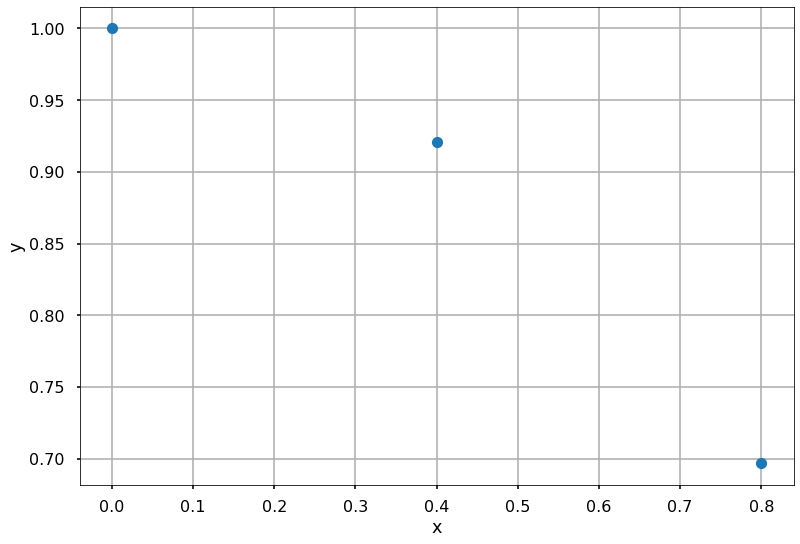

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.4, 0.8], float)
y = np.array([1, 0.921061, 0.696707], float)

xInput = 0.5

n = len(x)-1

ST = np.zeros((n+1,n+1))
ST[:,0] = y

for k in range(1, n+1):
    for i in range(0, n-k+1):
        ST[i,k] = (ST[i+1, k-1] - ST[i, k-1])/(x[i+k]-x[i])

p = ST[0,0]
for i in range(1,n+1):
    a = ST[0,i]

    for k in range(0,i):
        a = a * (xInput - x[k])
    p += a

xplt = np.linspace(x[0],x[-1])

plt.plot(x, y, "o")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()